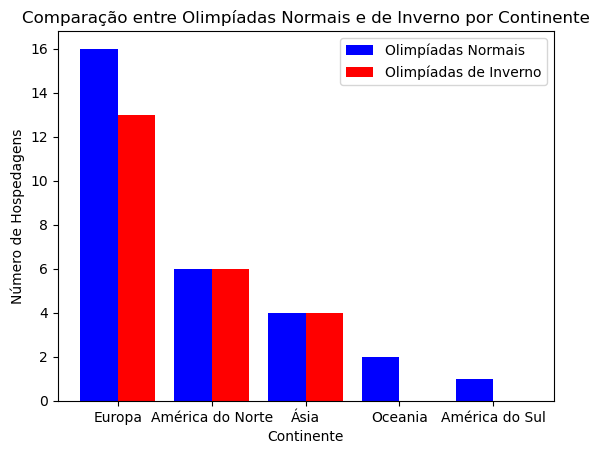

In [1]:
# importando as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Ler o arquivo CSV das Olimpíadas normais e criar o DataFrame
df_olimpiadas_normais = pd.read_csv('jogos.csv')
# Ler o arquivo CSV das Olimpíadas de Inverno e criar o DataFrame
df_olimpiadas_inverno = pd.read_csv('jogos_invernais.csv')

# Agrupar as contagens por continente nas Olimpíadas normais e somar o número de hospedagens
tabela_hospedagem_normais = df_olimpiadas_normais.groupby('Continente').size().reset_index(name='Número de Hospedagens Normais')

# Agrupar as contagens por continente nas Olimpíadas de Inverno e somar o número de hospedagens
tabela_hospedagem_inverno = df_olimpiadas_inverno.groupby('Continente').size().reset_index(name='Número de Hospedagens de Inverno')

# Fazer um merge dos dois dataframes para incluir todos os continentes
tabela_hospedagem = pd.merge(tabela_hospedagem_normais, tabela_hospedagem_inverno, on='Continente', how='outer')

# Substituir os valores NaN por 0, para os continentes que nunca hospedaram Olimpíadas de Inverno
tabela_hospedagem.fillna(0, inplace=True)

# Ordenar a tabela em ordem decrescente pelo número de hospedagens
tabela_hospedagem.sort_values(by=['Número de Hospedagens Normais', 'Número de Hospedagens de Inverno'], ascending=False, inplace=True)

# Obter os índices das barras
indices = np.arange(len(tabela_hospedagem))

# Definir a largura das barras
largura = 0.4

# Criar o gráfico de barras comparando as Olimpíadas normais e as de Inverno
plt.bar(indices - largura/2, tabela_hospedagem['Número de Hospedagens Normais'], largura, color='blue', label='Olimpíadas Normais')
plt.bar(indices + largura/2, tabela_hospedagem['Número de Hospedagens de Inverno'], largura, color='red', label='Olimpíadas de Inverno')

# Adicionar título e rótulos aos eixos
plt.title('Comparação entre Olimpíadas Normais e de Inverno por Continente')
plt.xlabel('Continente')
plt.ylabel('Número de Hospedagens')

# Definir os rótulos dos ticks no eixo x
plt.xticks(indices, tabela_hospedagem['Continente'])

# Adicionar legenda
plt.legend()

# Exibir o gráfico
plt.show()